In [24]:
import torch
from torch.utils.data import Dataset 
import cv2
import matplotlib.pyplot as plt
import os

1 60ee748793
./data/formula_images/60ee748793.png


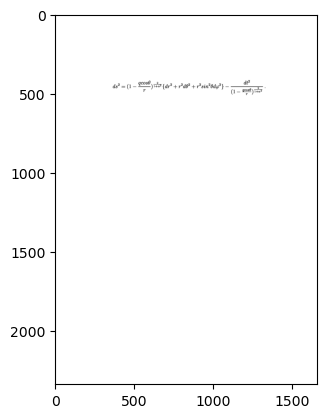

\int_{-\epsilon}^\infty dl\: {\rm e}^{-l\zeta}	\int_{-\epsilon}^\infty dl' {\rm e}^{-l'\zeta}	ll'{l'-l \over l+l'} \{3\,\delta''(l) - {3 \over 4}t\,\delta(l) \} =0.		\label{eq21}



In [36]:
lines_path = "./data/im2latex_train.lst"
img_dir = "./data/formula_images/"
file = open(lines_path, "r")
lines = file.readlines()
formula_index, img_name, _ = lines[0].split(" ")
print(formula_index, img_name)
path = os.path.join(img_dir, img_name + ".png")
print(path)
img = cv2.imread(path)
plot = plt.imshow(img)
plt.show()

formulas_path = "./data/im2latex_formulas.lst"
file = open(formulas_path, "r", encoding = "ISO-8859-1")
lines = file.readlines()
print(lines[0])

In [37]:
class Im2LatexDataset(Dataset):
    def __init__(self, lines_path: str, formulas_path: str, img_dir: str):
        with open(lines_path, "r") as lines_file:
            self.lines = lines_file.readlines()

        with open(formulas_path, "r", encoding="ISO-8859-1") as formulas_file:
            self.formulas = formulas_file.readlines()
        
        self.img_dir = img_dir

    def __len__(self):
        return len(self.lines)

    def __getitem__(self, index):
        formula_index, img_name, _ = self.lines[0].split(" ")

        img_path = os.path.join(self.img_dir, img_name + ".png")
        img = torch.FloatTensor(cv2.imread(path))

        label = self.formulas[int(formula_index)]
        
        return img, label


In [38]:
lines_path = "./data/im2latex_train.lst"
formulas_path = "./data/im2latex_formulas.lst"
img_dir = "./data/formula_images/"

dataset = Im2LatexDataset(lines_path=lines_path, formulas_path=formulas_path, img_dir=img_dir)